# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [8]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar a base de dados
caminho_arquivo = "C:/Users/Acer/Desktop/Paulo/DESENVOLVIMENTO PROFISSIONAL/DATA SCIENCE/EBAC/notbooks/mod7/dados_modificados.csv"
dados = pd.read_csv(caminho_arquivo)

# Verificar se há valores faltantes e tratar, se necessário
if dados.isnull().sum().any():
    dados = dados.dropna()  # Exemplo: remover linhas com valores faltantes

# Separar variável resposta e variáveis explicativas
X = dados.drop(columns=['mau_True'])  # Ajuste no nome da coluna
y = dados['mau_True']  # Ajuste no nome da coluna

# Separar os dados em conjuntos de treinamento e validação
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimir o tamanho dos conjuntos de treinamento e validação
print("Tamanho do conjunto de treinamento:", X_treino.shape[0])
print("Tamanho do conjunto de validação:", X_validacao.shape[0])


Tamanho do conjunto de treinamento: 11655
Tamanho do conjunto de validação: 4995


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

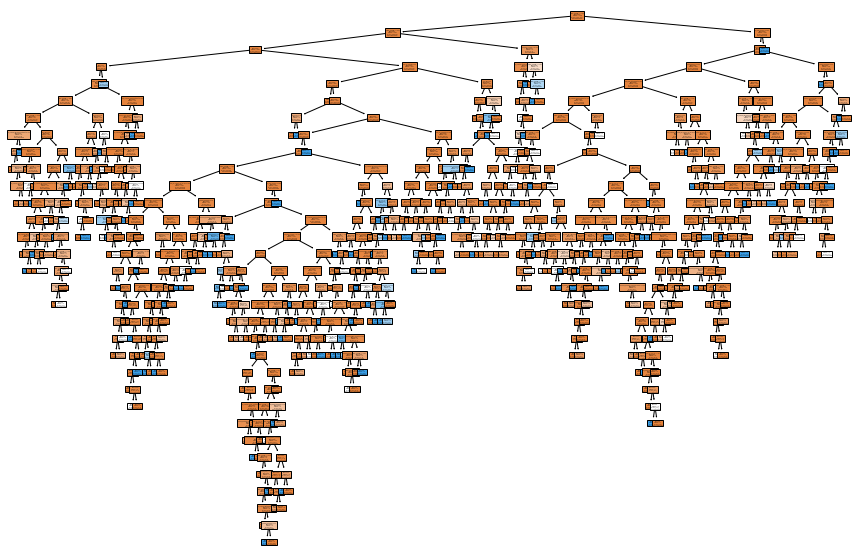

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

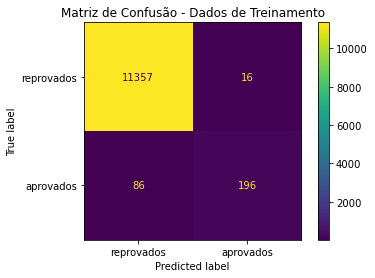

Acurácia na base de treinamento: 0.9912483912483913


In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar a base de dados
caminho_arquivo = "C:/Users/Acer/Desktop/Paulo/DESENVOLVIMENTO PROFISSIONAL/DATA SCIENCE/EBAC/notbooks/mod7/dados_modificados.csv"
dados = pd.read_csv(caminho_arquivo)

# Verificar se há valores faltantes e tratar, se necessário
if dados.isnull().sum().any():
    dados = dados.dropna()  # Exemplo: remover linhas com valores faltantes

# Separar variável resposta e variáveis explicativas
X = dados.drop(columns=['mau_True'])
y = dados['mau_True']

# Separar os dados em conjuntos de treinamento e validação
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_treino, y_treino)

# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=["reprovados", "aprovados"])
plt.show()

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
plot_confusion_matrix(modelo_arvore, X_treino, y_treino, display_labels=["reprovados", "aprovados"])
plt.title("Matriz de Confusão - Dados de Treinamento")
plt.show()

# Calcular a acurácia na base de treinamento
acuracia_treinamento = modelo_arvore.score(X_treino, y_treino)
print("Acurácia na base de treinamento:", acuracia_treinamento)



#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

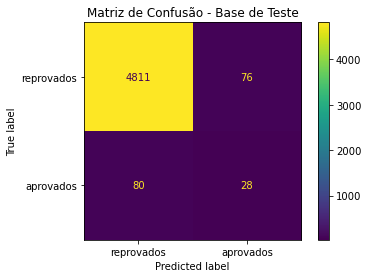

Acurácia na base de teste: 0.9687687687687687


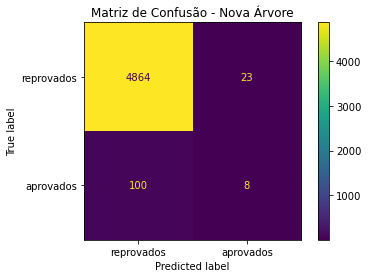

Proporção de proponentes classificados como 'maus': 0.006206206206206206


In [12]:
from sklearn.metrics import accuracy_score

# Classificar a base de teste de acordo com a árvore treinada
y_pred_teste = modelo_arvore.predict(X_validacao)

# Produzir a visualização da matriz de confusão para a base de teste
cm_teste = confusion_matrix(y_validacao, y_pred_teste)
disp_teste = ConfusionMatrixDisplay(confusion_matrix=cm_teste, display_labels=["reprovados", "aprovados"])
disp_teste.plot()
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

# Calcular a acurácia da base de teste
acuracia_teste = accuracy_score(y_validacao, y_pred_teste)
print("Acurácia na base de teste:", acuracia_teste)

# Treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
modelo_arvore_nova = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore_nova.fit(X_treino, y_treino)

# Avaliar a matriz de classificação
y_pred_nova = modelo_arvore_nova.predict(X_validacao)
cm_nova = confusion_matrix(y_validacao, y_pred_nova)
disp_nova = ConfusionMatrixDisplay(confusion_matrix=cm_nova, display_labels=["reprovados", "aprovados"])
disp_nova.plot()
plt.title("Matriz de Confusão - Nova Árvore")
plt.show()

# Observar a distribuição da predição - proporção de proponentes classificados como 'maus'
proporcao_maus = (y_pred_nova == 1).sum() / len(y_pred_nova)
print("Proporção de proponentes classificados como 'maus':", proporcao_maus)

# Acurácia se todo
